0️⃣ Notebook Goal (Markdown cell)

Establish a clear, exec-safe engagement metric framework that distinguishes between signal and noise, defines guardrails, and prevents misinterpretation of aggregate trends.

In [8]:
import pandas as pd

users = pd.read_csv("data_design/users.csv", parse_dates=["signup_date"])
events = pd.read_csv("data_design/events.csv", parse_dates=["event_time", "first_seen"])
calendar = pd.read_csv("data_design/calendar_effects.csv", parse_dates=["date"])


In [9]:
events["date"] = events["event_time"].dt.date

daily_sessions = events.groupby("date").size()
daily_active_users = events.groupby("date")["user_id"].nunique()

esau = (daily_sessions / daily_active_users).rename("ESAU")


<Axes: title={'center': 'Engaged Sessions per Active User (ESAU)'}, xlabel='date'>

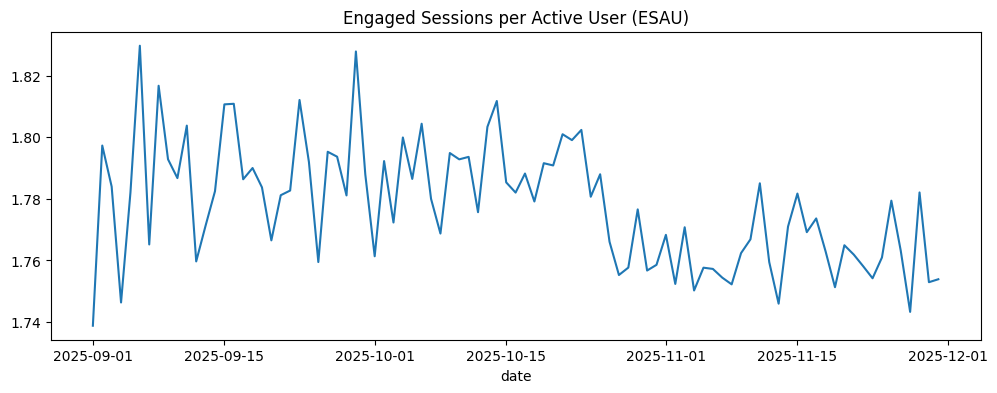

In [10]:
esau.plot(
    title="Engaged Sessions per Active User (ESAU)",
    figsize=(12, 4)
)


<Axes: title={'center': 'Sessions per Active User by Cohort Quality'}, xlabel='date'>

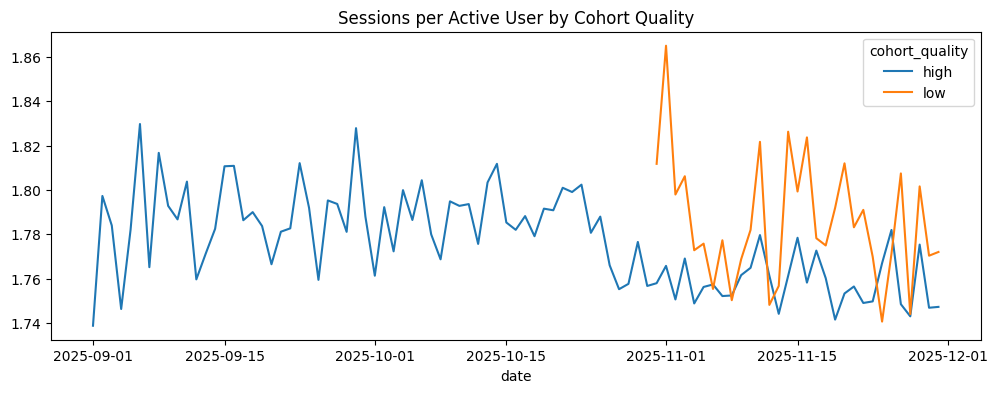

In [11]:
events = events.merge(
    users[["user_id", "cohort_quality"]],
    on="user_id",
    how="left"
)

sessions_per_user = (
    events
    .groupby(["date", "cohort_quality"])["user_id"]
    .count()
    /
    events
    .groupby(["date", "cohort_quality"])["user_id"]
    .nunique()
)

sessions_per_user.unstack().plot(
    figsize=(12, 4),
    title="Sessions per Active User by Cohort Quality"
)


<Axes: title={'center': 'Daily Active Users (Guardrail)'}, xlabel='date'>

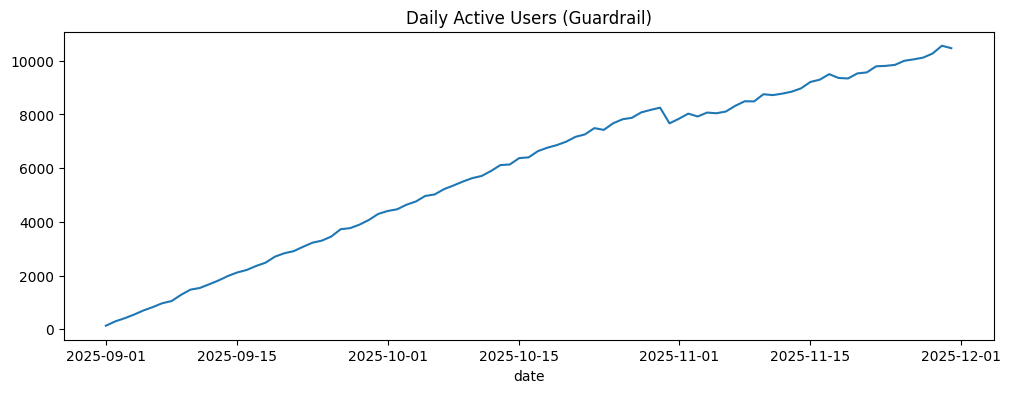

In [12]:
dau = daily_active_users.rename("DAU")

dau.plot(
    title="Daily Active Users (Guardrail)",
    figsize=(12, 4)
)


<Axes: title={'center': 'Returning User Share (Guardrail)'}, xlabel='date'>

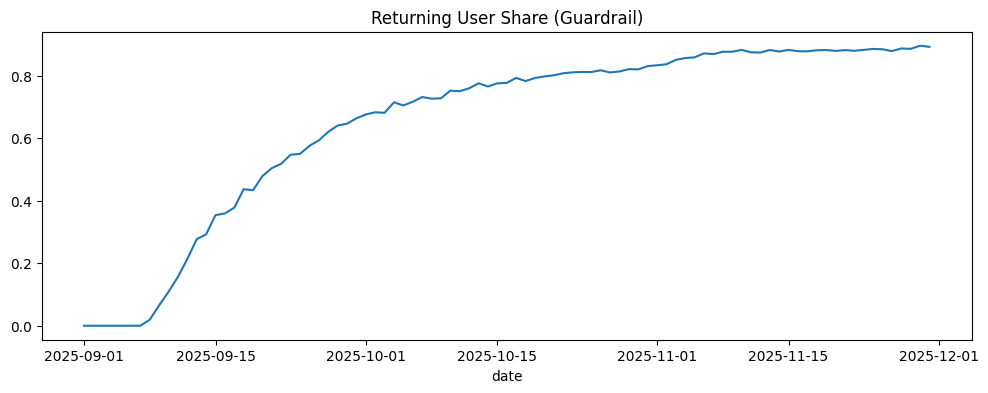

In [16]:
first_seen = events.groupby("user_id")["event_time"].min().rename("first_seen")
events = events.merge(first_seen, on="user_id")

events["is_returning"] = (
    events["event_time"] >
    events["first_seen_x"] + pd.Timedelta(days=7)
)

returning_share = (
    events
    .groupby("date")["is_returning"]
    .mean()
)

returning_share.plot(
    title="Returning User Share (Guardrail)",
    figsize=(12, 4)
)


In [17]:
metric_definitions = pd.DataFrame({
    "metric_name": [
        "ESAU",
        "DAU",
        "Returning User Share"
    ],
    "definition": [
        "Total sessions divided by active users per day",
        "Unique active users per day",
        "Share of daily activity from users active >7 days"
    ],
    "purpose": [
        "Primary engagement health metric",
        "Guardrail for growth/churn",
        "Detect core user disengagement"
    ]
})

metric_definitions


,metric_name,definition,purpose
0,ESAU,Total sessions divided by active users per day,Primary engagement health metric
1,DAU,Unique active users per day,Guardrail for growth/churn
2,Returning User Share,Share of daily activity from users active >7 days,Detect core user disengagement
